- 2022 웹/파이썬 프로그래밍 텀프로젝트
- NBA에서 가장 중요한 공격스탯은 무엇일까


# (1) 주제 선정 이유: 
이번 텀프로젝트를 준비하면서, 어떤 것을 주제로 해야할 지에 대해서 고민했습니다. 이번 텀프로젝트를 잘 해내기 위해서는, <br>(1) 코딩을 잘하는 것 <br>(2) 선정한 주제에 대해 깊은 지식을 가지고 분석하는 것 <br>이 두가지가 필요하다고 생각했습니다. <br> 프로젝트를 준비하면서, api와 같은 문서들을 많이 보았는데, api를 사용하기에는 제 코딩 실력이 뒷받혀 주지 않아서 (2)번 항목에 더 집중하기로 했습니다.<br>


저는 농구를 좋아하고 NBA를 굉장히 즐겨봅니다. 또한, NBA에는 선수들의 스탯과 관련된 굉장히 상세한 자료들이 있습니다. 그렇기 때문에, 이번 텀프로젝트를 준비할 때, NBA와 관련된 데이터 분석을 해보자고 생각했습니다. <br> 

# (2) 가설 정의: 

새롭게 알고자 하는 논리를 바꿨습니다. 저는 NBA의 통계를 이용해서 NBA의 트렌드 변화를 밝히려고 했습니다. <br>그런데, nba관련 데이터를 많이 보면서 새로운 생각이 들었습니다.  


결국 농구는 매 포제션(수비 -> 공격으로 바뀌어서 새롭게 공격하는 것)마다 득점을 시도하고, 득점을 1짐이라도 많이 하는 팀이 이기는 스포츠입니다. 그렇다면 가장 효율적으로 이기는 방법은 무엇인지에 대한 궁금증이 생겼습니다.<br>과거 마이클 조던의 시대에는 3점슛과 비교했을 때 2점슛의 비중이 압도적으로 높았습니다. 하지만 현재는 3점슛이 NBA에서 더 중요한 가치가 되었습니다. 

농구에서는 어떤 가치가 가장 중요한 것일까?<br>NBA도 자주보고, 실제로 농구도 많이 해봤지만, 가장 효율적인 농구에 대해서는 생각해 본적이 없었습니다. 

농구가 데이터만을 이용해서 수학적으로 이루어지는게 아닌 것은 알지만, 농구에서의 가장 중요한 가치(스탯)를 판단하고, 그 데이터를 이용해서 가장 효율적으로 이기는 방법에 대해서 알아보겠습니다. <br>.

# (3) 인터넷을 통한 데이터 획득:

<br>농구를 이기는 방법은 득점을 상대방 보다 많이 내는 것 입니다. 그렇기 때문에 농구는 공격이 더 중요한 스포츠 입니다.
그래서 공격시 공격하는 팀이 가질 수 있는 스탯인 2점슛 성공률, 2점슛 시도 개수, 3점슛 성공률,
3점슛 시도개수, 리바운드 중 공격리바운드의 개수(공격리바운드를 따면 포제션이 추가적으로 주어지는 것이나 마찬가지이기 때문입니다.)
경기당 포제션의 개수를 가지는 데이터를 긁어왔습니다.

원래 nba.com에서 데이터 크롤링을 해서 프로젝트를 진행하려 했으나, 단순하게 개발자도구로는 크롤링이 되지 않아, basketball reference 라는 사이트를 통해 크롤링 했습니다. 

크롤링은 https://www.basketball-reference.com/leagues/NBA_stats_per_game.html 사이트에서 진행했으며,  
[1] 2021-22 시즌의 자료를 크롤링했습니다..  
[2] BeautifulSoup를 사용해서 크롤링하기 쉽게 사이트의 html을 변환한 후,  
[3] season fga 3pa fta orb drb trb ast stl blk tov fg% 3p% ft%,pace 데이터 순으로 크롤링했습니다.    
[4] 각각의 데이터 경로는 개발자 도구에서의 경로 복사를 이용해서 soup.select() 파라미터에 넣었습니다.  
[5] li 리스트에 저장된 정보들을 순차적으로 season 리스트와 basketball 리스트에 넣었습니다.<br>
[6] season과 basketball리스트를 이용해서 df라는 DataFrame을 만들었습니다. df는 데이터 가공에 주로 이용되는 자료입니다.<br>
fg: 필드골 성공 개수 <br> fga: 필드골 시도 개수 <br> 3p: 3점슛 성공개수 <br> 3pa: 3점슛 시도 개수 <br> ft: 자유투 성공 개수 <br> fta: 자유투 시도개수 <br> orb: 공격리바운드 개수 <br> tov: 턴오버 개수 <br> fg%: 필드골 성공율 <br> 3p%: 3점슛 성공율 <br> ft%: 자유투 성공율 <br> pace: 경기당 각팀이 사용하는 포제션 개수 (포제션: 수비리바운드후 상대팀의 수비 성공 까지) <br> 





## 3.1) 데이터 크롤링 코드

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


data = []
team_response = requests.get("https://www.basketball-reference.com/leagues/NBA_stats_per_game.html")
soup = BeautifulSoup(team_response.text, 'html.parser')
for i in range(1,2):
    li = []
    season = soup.select("#stats > tbody > tr:nth-child({}) > td:nth-child(2) > a".format(i))
    li.append(season[0].text)
    for j in [9,10,11,12,13, 14,15,21,24,25,26,27]:
        elem = soup.select("#stats > tbody > tr:nth-child({}) > td:nth-child({})".format(i,j))
        li.append(elem[0].text)
    data.append(li)

season = []
basketdata = []
for li in data:
    season.append(li[0])
    basketdata.append(li[1:])
    
df = pd.DataFrame(basketdata, index=season, columns = ["fg","fga","3p", "3pa","ft","fta","orb","tov","fg%","3p%","ft%", "pace"], dtype = float)

In [2]:
df

,fg,fga,3p,3pa,ft,fta,orb,tov,fg%,3p%,ft%,pace
2021-22,40.6,88.1,12.4,35.2,16.9,21.9,10.3,13.8,0.461,0.354,0.775,98.2


# (4) 분석을 위한 데이터의 가공: 


## 4.1) 2점슛, 공격시도 당 자유투 개수 데이터 가공

필드골관련 데이터(fg, fga)가 2점슛을 의미하는줄 알았으나, 2점슛과 3점슛 모두를 의미하는 수치여서, 2점슛데이터를 수학적 방법으로 새롭게 가공했습니다.
필드골시도개수 - 3점슛시도개수 = 2점슛시도개수<br>
필드골성공개수 - 3점슛성공개수 = 2점슛성공개수<br>
이 두가지 데이터를 새롭게 가공해서, 2점슛 성공율을 구했습니다.

포제션 공격시도 당 평균 자유투 획득 개수를 의미하는 ftpa(free throw per attempt)도 새롭게 만들었습니다.<br>
사실 자유투는 슈팅 파울로만 주어지는 것은 아니여서 정확하지 않지만, 대부분 슈팅파울로 주어지기 때문에 오차가 크지 않을 것 같아서 진행했습니다.

In [3]:
# 필드골은 2점슛과 3점슛이 모두 포함된 수치여서 2점슛의 확률을 다시 구함.
df["2p"] = df["fg"] - df["3p"]
df["2pa"] = df["fga"] - df["3pa"]
df["2p%"] = round(df["2p"]/df["2pa"],3)
df["ftpa"] = round(df["fta"]/df["pace"],3)

df

,fg,fga,3p,3pa,ft,fta,orb,tov,fg%,3p%,ft%,pace,2p,2pa,2p%,ftpa
2021-22,40.6,88.1,12.4,35.2,16.9,21.9,10.3,13.8,0.461,0.354,0.775,98.2,28.2,52.9,0.533,0.223


## 4.2) 득점 기댓값 데이터 가공

농구에는 2점슛과 3점슛, 그리고 파울로 얻을 수 있는 자유투가 있습니다. <br>저는 각 포제션 마다 공격을 시도할 때, 각 공격의 기댓값에 대해서 알고싶었습니다. <br> 단순히 슈팅 성공률 뿐만 아니라 농구의 규칙과, 공격리바운드, 턴오버 까지 고려한 포제션당 득점 기댓값을 알고 싶었습니다. <br>
아래는 그 코드이고, 그 아래는 논리적인 설명입니다.

In [4]:
#단순히 슛 시도시 얻을 수 있는 득점기댓값

''' 슛 시도시 슛 성공 후 파울을 당해 자유투를 하나 더 얻을 수도 있다.
슛실패를 했을 때도 파울을 당하면 당했을 시에는 2점슛일 경우 2개의 자유투, 3점슛일 경우 3개의 자유투를 얻음 
이것들을 고려해서 슛 시도를 하면 얻을 수 있는 득점 값을 exdf에 저장함.'''

exdf = pd.DataFrame()

#2점슛 시도시 얻을 수 있는 득점 기대값
exdf["ex2p"] = round((df["2p%"] * 2) +(df["2p%"] * 2 * df["ftpa"] * df["ft%"]) +((1-df["2p%"]) * df["ftpa"] * df["ft%"] **2),3) 

#3점슛 시도시 얻을 수 있는 득점 기대값
exdf["ex3p"] = round((df["3p%"] * 3) + (df["3p%"] * 3 * df["ftpa"] * df["ft%"]) + ((1-df["3p%"]) * df["ftpa"] * df["ft%"] **3),3)

#포제션당 득점 기댓값

'''슛시도후 실패했을 때, 공격리바운드를 잡거나, 턴오버 발생시 까지 고려한 포제션당 득점 기댓값을 df에 저장함.
pace는 경기당 평균 포제션 수인데 그 값을 이용해서, 포제션당 턴오버, 공격리바운드 횟수를 구하고 이용함'''

df["ex2p"] = round((exdf["ex2p"]+(1-df["2p%"])*df["orb"]/df["pace"]*exdf["ex2p"] - df["tov"]/df["pace"] * exdf["ex2p"])*df["2pa"], 3)
df["ex3p"] = round((exdf["ex3p"]+(1-df["3p%"])*df["orb"]/df["pace"]*exdf["ex3p"] - df["tov"]/df["pace"] * exdf["ex3p"])*df["3pa"], 3)
df["extp"] = df["ex2p"] + df["ex3p"]
df

,fg,fga,3p,3pa,ft,fta,orb,tov,fg%,3p%,ft%,pace,2p,2pa,2p%,ftpa,ex2p,ex3p,extp
2021-22,40.6,88.1,12.4,35.2,16.9,21.9,10.3,13.8,0.461,0.354,0.775,98.2,28.2,52.9,0.533,0.223,63.099,42.854,105.953


임시로 수치를 저장해줄 데이터프레임인 exdf를 만들었습니다. exdf에는 공격시 단순히 슛시도만을 고려한 득점기대값 입니다. <br>2점슛과 3점슛 각각의 기대값을 구했습니다.
1) 슛시도시 슛성공 후 자유투 미획득<br>
2) 슛시도시 슛 성공후 자유투 획득<br>
3) 슛 시도시 슛 실패후 자유투 획득<br>
<br>즉, exdf는 위 3가지만을 고려한 데이터 입니다.

하지만, 공격 시 공격리바운드를 통한 추가 공격기회를 얻을 수 있고, 공격시 실책(턴오버를 의미함)을 통해서 공격시도 자체를 날릴 수 있습니다.<br>
그래서 <b>포제션당 평균 공격리바운드</b>와 <b>포제션당 평균 턴오버 개수</b>를 구하고, <b>exdf에 있는 슛시도 시 득점기대값</b>과 함께 최종적인 득점 기대값을 구했습니다.<br> 


그 데이터를 최종적으로 사용하게 되는 데이터 프레임인 df에 추가했습니다.

ex2p: 경기당 2점슛으로 얻는 평균 득점<br>
ex3p: 경기당 3점슛으로 얻는 평균 득점<br>
extp: 경기당 평균 득점(제가 수학적으로 구한 수치로, 실제 평균득점과는 차이가 있습니다. 단순히 공격만을 분석한 데이터이기 때문입니다.)

## 4.3) 세부 스탯변화시 최종 득점 기대값과의 차이 데이터 가공

가치 있는 스탯은, 경기의 최종득점에 더 많은 변화를 일으키는 것이라고 할 수 있습니다. 
<br>따라서 저는, 각 스탯의 변화량에 따른 최종득점의 변화량에 대한 데이터를 가공했습니다. 
<br>2p%, 3p%, ft%, 2pa, 3pa, fta, orb, tov 의 변화에 따른 최종득점 변화값을 알아봤습니다.




In [5]:
expdf2p = pd.DataFrame()
temp = df.copy()
dddfff = pd.DataFrame()


for X in range(-10,11):
    temp = df.copy()
    
    temp["2p%"] = temp["2p%"] + X * 0.01
    
    dddfff["ex2p"] = round((temp["2p%"] * 2) + (temp["2p%"] * 2 * df["ftpa"] * temp["ft%"]) + \
                         ((1-temp["2p%"]) * df["ftpa"] * temp["ft%"] **2),3)
    
    dddfff["ex3p"] = round((temp["3p%"] * 3) + (temp["3p%"] * 3 * temp["ftpa"] * temp["ft%"]) + \
                         ((1-temp["3p%"]) * temp["ftpa"] * temp["ft%"] **3),3)

    
    temp["ex2p"] = round((dddfff["ex2p"]+(1-temp["2p%"])*temp["orb"]/temp["pace"]*dddfff["ex2p"] - temp["tov"]/temp["pace"] * dddfff["ex2p"])*temp["2pa"], 3)
    temp["ex3p"] = round((dddfff["ex3p"]+(1-temp["3p%"])*temp["orb"]/temp["pace"]*dddfff["ex3p"] - temp["tov"]/temp["pace"] * dddfff["ex3p"])*temp["3pa"], 3)
    temp["extp"] = temp["ex2p"] + temp["ex3p"]
    
    expdf2p["{}".format(X)] = temp["extp"] - df["extp"]
expdf2p.index= ["extp_2p%"]


In [6]:
expdf3p = pd.DataFrame()
temp = df.copy()
dddfff = pd.DataFrame()


for X in range(-10,11,):
    temp = df.copy()
    
    #temp["2p%"] = temp["2p%"] + X * 0.01
    temp["3p%"] = temp["3p%"] + X * 0.01
    #temp["ft%"] = temp["ft%"] + X * 0.01
    
    dddfff["ex2p"] = round((temp["2p%"] * 2) + (temp["2p%"] * 2 * df["ftpa"] * temp["ft%"]) + \
                         ((1-temp["2p%"]) * df["ftpa"] * temp["ft%"] **2),3)
    
    dddfff["ex3p"] = round((temp["3p%"] * 3) + (temp["3p%"] * 3 * temp["ftpa"] * temp["ft%"]) + \
                         ((1-temp["3p%"]) * temp["ftpa"] * temp["ft%"] **3),3)

    
    temp["ex2p"] = round((dddfff["ex2p"]+(1-temp["2p%"])*temp["orb"]/temp["pace"]*dddfff["ex2p"] - temp["tov"]/temp["pace"] * dddfff["ex2p"])*temp["2pa"], 3)
    temp["ex3p"] = round((dddfff["ex3p"]+(1-temp["3p%"])*temp["orb"]/temp["pace"]*dddfff["ex3p"] - temp["tov"]/temp["pace"] * dddfff["ex3p"])*temp["3pa"], 3)
    temp["extp"] = temp["ex2p"] + temp["ex3p"]
    
    expdf3p["{}".format(X)] = temp["extp"] - df["extp"]
expdf3p.index= ["extp_3p%"]


In [7]:
expdfft = pd.DataFrame()
temp = df.copy()
dddfff = pd.DataFrame()


for X in range(-10,11,):
    temp = df.copy()
    
    #temp["2p%"] = temp["2p%"] + X * 0.01
    #temp["3p%"] = temp["3p%"] + X * 0.01
    temp["ft%"] = temp["ft%"] + X * 0.01
    
    dddfff["ex2p"] = round((temp["2p%"] * 2) + (temp["2p%"] * 2 * df["ftpa"] * temp["ft%"]) + \
                         ((1-temp["2p%"]) * df["ftpa"] * temp["ft%"] **2),3)
    
    dddfff["ex3p"] = round((temp["3p%"] * 3) + (temp["3p%"] * 3 * temp["ftpa"] * temp["ft%"]) + \
                         ((1-temp["3p%"]) * temp["ftpa"] * temp["ft%"] **3),3)

    
    temp["ex2p"] = round((dddfff["ex2p"]+(1-temp["2p%"])*temp["orb"]/temp["pace"]*dddfff["ex2p"] - temp["tov"]/temp["pace"] * dddfff["ex2p"])*temp["2pa"], 3)
    temp["ex3p"] = round((dddfff["ex3p"]+(1-temp["3p%"])*temp["orb"]/temp["pace"]*dddfff["ex3p"] - temp["tov"]/temp["pace"] * dddfff["ex3p"])*temp["3pa"], 3)
    temp["extp"] = temp["ex2p"] + temp["ex3p"]
    
    expdfft["{}".format(X)] = temp["extp"] - df["extp"]
expdfft.index= ["extp_ft%"]


In [8]:
expdf2pa = pd.DataFrame()
temp2 = df.copy()
dddfff2 = pd.DataFrame()


for X in range(-10,11,):
    temp2 = df.copy()
    
    temp2["2pa"] = temp2["2pa"] + X 
    
    dddfff2["ex2p"] = round((temp2["2p%"] * 2) + (temp2["2p%"] * 2 * df["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["2p%"]) * df["ftpa"] * temp2["ft%"] **2),3)
    
    dddfff2["ex3p"] = round((temp2["3p%"] * 3) + (temp2["3p%"] * 3 * temp2["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["3p%"]) * temp2["ftpa"] * temp2["ft%"] **3),3)

    
    temp2["ex2p"] = round((dddfff2["ex2p"]+(1-temp2["2p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex2p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex2p"])*temp2["2pa"], 3)
    temp2["ex3p"] = round((dddfff2["ex3p"]+(1-temp2["3p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex3p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex3p"])*temp2["3pa"], 3)
    temp2["extp"] = temp2["ex2p"] + temp2["ex3p"]
    
    expdf2pa["{}".format(X)] = temp2["extp"] - df["extp"]
    
expdf2pa.index= ["extp_2pa"]


In [9]:
expdf3pa = pd.DataFrame()
temp2 = df.copy()
dddfff2 = pd.DataFrame()


for X in range(-10,11,):
    temp2 = df.copy()
    
    temp2["3pa"] = temp2["3pa"] + X 
    
    dddfff2["ex2p"] = round((temp2["2p%"] * 2) + (temp2["2p%"] * 2 * df["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["2p%"]) * df["ftpa"] * temp2["ft%"] **2),3)
    
    dddfff2["ex3p"] = round((temp2["3p%"] * 3) + (temp2["3p%"] * 3 * temp2["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["3p%"]) * temp2["ftpa"] * temp2["ft%"] **3),3)

    
    temp2["ex2p"] = round((dddfff2["ex2p"]+(1-temp2["2p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex2p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex2p"])*temp2["2pa"], 3)
    temp2["ex3p"] = round((dddfff2["ex3p"]+(1-temp2["3p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex3p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex3p"])*temp2["3pa"], 3)
    temp2["extp"] = temp2["ex2p"] + temp2["ex3p"]
    
    expdf3pa["{}".format(X)] = temp2["extp"] - df["extp"]
    
expdf3pa.index= ["extp_3pa"]


In [10]:
expdffta = pd.DataFrame()
temp2 = df.copy()
dddfff2 = pd.DataFrame()


for X in range(-10,11,):
    temp2 = df.copy()
    
    temp2["fta"] = temp2["fta"] + X 
    temp2["ftpa"] = round(temp2["fta"]/temp2["pace"], 3)
    
    dddfff2["ex2p"] = round((temp2["2p%"] * 2) + (temp2["2p%"] * 2 * df["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["2p%"]) * df["ftpa"] * temp2["ft%"] **2),3)
    
    dddfff2["ex3p"] = round((temp2["3p%"] * 3) + (temp2["3p%"] * 3 * temp2["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["3p%"]) * temp2["ftpa"] * temp2["ft%"] **3),3)

    
    temp2["ex2p"] = round((dddfff2["ex2p"]+(1-temp2["2p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex2p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex2p"])*temp2["2pa"], 3)
    temp2["ex3p"] = round((dddfff2["ex3p"]+(1-temp2["3p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex3p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex3p"])*temp2["3pa"], 3)
    temp2["extp"] = temp2["ex2p"] + temp2["ex3p"]
    
    expdffta["{}".format(X)] = temp2["extp"] - df["extp"]
    
expdffta.index= ["extp_fta"]


In [11]:
#공격리바운드개수의 변화시 마다, 최종점수가 얼마나 차이가 나는지 계산함.

expdforb = pd.DataFrame()
temp2 = df.copy()
dddfff2 = pd.DataFrame()


for X in range(-5,6,):
    temp2 = df.copy()
    
    temp2["orb"] = temp2["orb"] + X 
    
    dddfff2["ex2p"] = round((temp2["2p%"] * 2) + (temp2["2p%"] * 2 * df["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["2p%"]) * df["ftpa"] * temp2["ft%"] **2),3)
    
    dddfff2["ex3p"] = round((temp2["3p%"] * 3) + (temp2["3p%"] * 3 * temp2["ftpa"] * temp2["ft%"]) + \
                         ((1-temp2["3p%"]) * temp2["ftpa"] * temp2["ft%"] **3),3)

    
    temp2["ex2p"] = round((dddfff2["ex2p"]+(1-temp2["2p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex2p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex2p"])*temp2["2pa"], 3)
    temp2["ex3p"] = round((dddfff2["ex3p"]+(1-temp2["3p%"])*temp2["orb"]/temp2["pace"]*dddfff2["ex3p"] - \
                           temp2["tov"]/temp2["pace"] * dddfff2["ex3p"])*temp2["3pa"], 3)
    temp2["extp"] = temp2["ex2p"] + temp2["ex3p"]
    
    expdforb["{}".format(X)] = temp2["extp"] - df["extp"]
    
expdforb.index= ["extp_orb"]


In [12]:
#턴오버개수의 변화시 마다, 최종점수가 얼마나 차이가 나는지 계산함.

expdftov = pd.DataFrame()
temp3 = df.copy()
dddfff3 = pd.DataFrame()


for X in range(5,-6,-1):
    temp3 = df.copy()
    
    temp3["tov"] = temp["tov"] + X 
    
    dddfff3["ex2p"] = round((temp3["2p%"] * 2) + (temp3["2p%"] * 2 * df["ftpa"] * temp3["ft%"]) + \
                         ((1-temp3["2p%"]) * df["ftpa"] * temp3["ft%"] **2),3)
    
    dddfff3["ex3p"] = round((temp3["3p%"] * 3) + (temp3["3p%"] * 3 * temp3["ftpa"] * temp3["ft%"]) + \
                         ((1-temp3["3p%"]) * temp3["ftpa"] * temp3["ft%"] **3),3)

    
    temp3["ex2p"] = round((dddfff3["ex2p"]+(1-temp3["2p%"])*temp3["orb"]/temp3["pace"]*dddfff3["ex2p"] -\
                           temp3["tov"]/temp3["pace"] * dddfff3["ex2p"])*temp3["2pa"], 3)
    temp3["ex3p"] = round((dddfff3["ex3p"]+(1-temp3["3p%"])*temp3["orb"]/temp3["pace"]*dddfff3["ex3p"] -\
                            temp3["tov"]/temp3["pace"] * dddfff3["ex2p"])*temp3["3pa"],3)
    temp3["extp"] = temp3["ex2p"] + temp3["ex3p"]

    expdftov["{}".format(X)] = -(temp3["extp"] - df["extp"])
    
expdftov.index= ["extp_tov (-)"]


<b>PS)</b>경기당 턴오버 개수의 변화에 따른 득점의 변화는 원래 우하향 그래프이지만, (턴오버는 최종 점수를 낮추는 요인이기 때문에)<br> 그래프 병합시 편의를 위해 (-)부호를 붙혔습니다.

In [13]:
expdf_pct = pd.concat([expdf2p.T,expdf3p.T,expdfft.T], axis=1)

In [14]:
expdf_a = pd.concat([expdf2pa.T,expdf3pa.T,expdffta.T], axis=1)

In [15]:
expdf_r = pd.concat([expdforb.T,expdftov.T],axis = 1,join='inner')

In [16]:
expdf_total = pd.concat([expdf_pct,expdf_a,expdf_r], axis=1, join='inner')
expdf_total

,extp_2p%,extp_3p%,extp_ft%,extp_2pa,extp_3pa,extp_fta,extp_orb,extp_tov (-)
-5,-5.001,-5.370,-1.744,-5.964,-6.087,-1.893,-3.171,-5.890
-4,-4.005,-4.298,-1.422,-4.771,-4.870,-1.501,-2.537,-4.712
-3,-3.012,-3.227,-1.066,-3.578,-3.652,-1.142,-1.903,-3.534
-2,-1.974,-2.160,-0.710,-2.386,-2.435,-0.750,-1.269,-2.357
-1,-0.986,-1.095,-0.355,-1.193,-1.217,-0.391,-0.634,-1.178
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
1,0.983,1.060,0.355,1.193,1.218,0.359,0.634,1.177
2,1.964,2.118,0.712,2.386,2.435,0.718,1.269,2.356
3,2.942,3.173,1.067,3.578,3.653,1.110,1.903,3.534
4,3.918,4.225,1.422,4.771,4.870,1.502,2.537,4.711


위와 같이 표가 나왔습니다. 편의를 위해서 그래프로도 보겠습니다.

<AxesSubplot:>

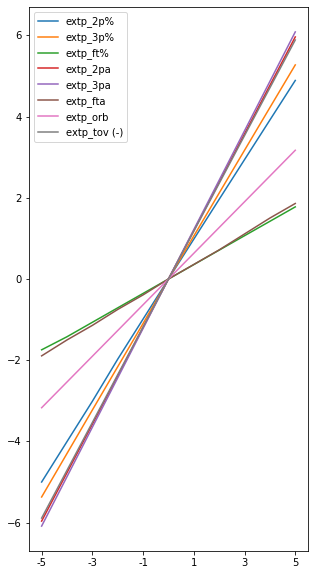

In [17]:
expdf_total.plot(figsize=(5,10))

# (5) 분석 결과 도출: 

## 5.1) 데이터 분석

위의 그래프가 가파를수록, 득점에 큰 영향을 미친다고 해석가능합니다.
<br>1) 3점시도개수 <br> 2) 2점시도개수 <br> 3) 턴오버개수 <br> 4) 3점성공률 <br>5) 2점성공률 <br>6) 공격리바운드개수 <br>7) 자유투시도개수 <br>8) 자유투 성공개수<br>순으로 중요도가 산출됩니다

<br>생각보다 야투변화, 개수의 변화마다의 최종 득점 차잇값이 선형적으로(비례적으로) 나왔습니다.<br>
그렇기 때문에 가중치 비교를 보다 쉽게 진행할 수 있습니다.

거의 선형적인 그래프를 가지기 때문에, 대략적인 선의 기울기(slope)를 구했습니다.

In [18]:
importancedf = pd.DataFrame((expdf_total.loc["5"] - expdf_total.loc["-5"])/10, columns = ["slope"])
importancedf.sort_values(by=["slope"], ascending=False, inplace = True)
importancedf

,slope
extp_3pa,1.2175
extp_2pa,1.1928
extp_tov (-),1.1779
extp_3p%,1.0645
extp_2p%,0.9893
extp_orb,0.6343
extp_fta,0.3754
extp_ft%,0.3521


## 5.2) 최종 데이터 

표에서 기울기의 의미는 스탯이 1 변하면 최종득점이 얼마나 변하는지에 대한 값입니다. 즉, 가중치로 해석 가능합니다. <br>아래부터는 1의 변화당 가치를 의미하는 value per one. 줄여서 VPO라고 쓰겠습니다.

In [19]:
importancedf["slope"] = round(importancedf["slope"],2)
importancedf.rename(columns = {"slope":"VPO"}, inplace=True) 
importancedf

,VPO
extp_3pa,1.22
extp_2pa,1.19
extp_tov (-),1.18
extp_3p%,1.06
extp_2p%,0.99
extp_orb,0.63
extp_fta,0.38
extp_ft%,0.35


## 5.3) 실측데이터와 비교

최종데이터를 NBA실제 팀의 정규시즌 성적에 대입했습니다.

### 5.3.1) 데이터 분석의 확장
처음 계획했던 데이터(VPO)는 사실 공격에 한정된 데이터 분석이었는데, 이는 상대팀을 수비할 때 상대팀의 스탯을 1만큼 억제할 때 상대팀의 득점 감소량으로 해석할 수 있기 때문에 제가 만든 VOP지표를 수비에도 적용할 수 있습니다. <br>
아래는 각 팀의 공격에서의 스탯와, 각 팀의 상대팀의 공격에서의 스탯(즉, 팀의 수비스탯라고 해석 가능함)를 토대로 VPO_off(공격지표)와 VPO_def(수비지표)를 구했습니다.
### 5.3.2) 데이터 분석  코드
처음 데이터 크롤링을 진행했던대로 웹에서 크롤링하는 것은 시간이 너무 오래걸렸습니다.<br>
그렇기 때문에 https://www.basketball-reference.com/leagues/NBA_2022.html 에 있는 표를 메모장에 붙혀넣기한 후에 파일을 읽어서 데이터프레임으로 변환한 후, 분석을 진행했습니다. 때문에, 압축파일로 nba 스탯을 첨부했습니다.
### 5.3.3) 공격평가지표 (VPO_off)
D가중치(VPO)를 이용했습니다. 각 팀 마다 리그평균스탯과의 차이를 구한 후, 각 스탯의 차이에 가중치(VPO)를 곱하고, 전부 합해서 공격시 기대 득점을 얻었습니다. (양의 값은 공격을 잘하는 것이고, 음의 값은 공격을 못하는 것입니다.)<br> VPO_off 제가 구한 지표를 기준으로 리그 평균 보다 얼마나 높은 득점을 하는지에 대한 값입니다.

In [20]:
nbastats = []

with open('nbastats.txt', 'r') as file:
    for lineContent in file: 
        nbastats.append(lineContent.replace("\t", ",").strip('\n').split(',')) 
        

nbastats_df = pd.DataFrame(nbastats[1:31],columns = nbastats[0])
nbastats_df = nbastats_df.astype({'3PA':'float','3P':'float','FGA':'float','FG':'float','TOV':'float','ORB':'float',\
                   'FTA':'float','FT%':'float','3P%':'float'})
nbastats_df["2pa"] = nbastats_df["FGA"] - nbastats_df["3PA"]
nbastats_df["2p"] = nbastats_df["FG"] - nbastats_df["3P"]
nbastats_df["2p%"] = nbastats_df["2p"]/ nbastats_df["2pa"]  
nbastats_df = nbastats_df[["Team","3PA","2pa","TOV","3P%","2p%","ORB", "FTA", "FT%"]]
nbastats_df["3PA"] -= df.loc["2021-22","3pa"]
nbastats_df["2pa"] -= df.loc["2021-22","2pa"]
nbastats_df["TOV"] -= df.loc["2021-22","tov"]
nbastats_df["3P%"] -= df.loc["2021-22","3p%"]
nbastats_df["2p%"] -= df.loc["2021-22","2p%"]
nbastats_df["ORB"] -= df.loc["2021-22","orb"]
nbastats_df["FTA"] -= df.loc["2021-22","fta"]
nbastats_df["FT%"] -= df.loc["2021-22","ft%"]
nbastats_df["3P%"] = round(nbastats_df["3P%"],4)
nbastats_df["2p%"] = round(nbastats_df["2p%"],4)
nbastats_df["FT%"] = round(nbastats_df["FT%"],4)
nbastats_df["VPO_off"] = nbastats_df["3PA"]/0.82 + nbastats_df["2pa"]/0.84 - nbastats_df["TOV"]/0.85 + nbastats_df["3P%"]*100/0.94 +\
                        nbastats_df["2p%"]*100/1.01 + nbastats_df["ORB"]/1.58 + nbastats_df["FTA"]/2.66 + nbastats_df["FT%"]*100/2.84

nbastats_df.sort_values(by = "VPO_off",ascending=False, inplace = True)
nbastats_df.index = nbastats_df["Team"]
nbastats_df.drop(columns = "Team", inplace = True)

nbastats_df = pd.DataFrame(nbastats_df["VPO_off"])
nbastats_df

,VPO_off
Team,
Memphis Grizzlies*,8.013696
Phoenix Suns*,5.945783
Charlotte Hornets,5.680120
Atlanta Hawks*,5.603516
Minnesota Timberwolves*,5.207040
San Antonio Spurs,4.861744
Milwaukee Bucks*,4.735578
Toronto Raptors*,2.941165
Utah Jazz*,2.412610


### 5.3.4) 수비평가지표 (VPO_def)
가중치(VPO)를 이용했습니다. 각 팀 마다 리그평균스탯과의 차이를 구한 후, 각 스탯의 차이에 가중치(VPO)를 곱하고, 전부 합해서 <b>수비시 상대팀의 득점 하락값</b>을 구했습니다. (양의 값은 수비를 잘하는 것이고, 음의 값은 수비를 못하는 것입니다.)<br> VPO_def는 제가 구한 지표를 기준으로 각 팀을 상대하는 팀이 리그 평균 보다 얼마나 낮은 득점을 하는지에 대한 값입니다.

In [21]:
nba_opponent_stats = []

with open('nba_opponent_stats.txt', 'r') as file:
    for lineContent in file: # Point.1
        nba_opponent_stats.append(lineContent.replace("\t", ",").strip('\n').split(','))
        

nba_opponent_stats_df = pd.DataFrame(nba_opponent_stats[1:31],columns = nba_opponent_stats[0])
nba_opponent_stats_df = nba_opponent_stats_df.astype({'3PA':'float','3P':'float','FGA':'float','FG':'float','TOV':'float','ORB':'float',\
                   'FTA':'float','FT%':'float','3P%':'float'})
nba_opponent_stats_df["2pa"] = nba_opponent_stats_df["FGA"] - nba_opponent_stats_df["3PA"]
nba_opponent_stats_df["2p"] = nba_opponent_stats_df["FG"] - nba_opponent_stats_df["3P"]
nba_opponent_stats_df["2p%"] = nba_opponent_stats_df["2p"]/ nba_opponent_stats_df["2pa"]  
nba_opponent_stats_df = nba_opponent_stats_df[["Team","3PA","2pa","TOV","3P%","2p%","ORB", "FTA", "FT%"]]
nba_opponent_stats_df["3PA"] -= df.loc["2021-22","3pa"]
nba_opponent_stats_df["2pa"] -= df.loc["2021-22","2pa"]
nba_opponent_stats_df["TOV"] -= df.loc["2021-22","tov"]
nba_opponent_stats_df["3P%"] -= df.loc["2021-22","3p%"]
nba_opponent_stats_df["2p%"] -= df.loc["2021-22","2p%"]
nba_opponent_stats_df["ORB"] -= df.loc["2021-22","orb"]
nba_opponent_stats_df["FTA"] -= df.loc["2021-22","fta"]
nba_opponent_stats_df["FT%"] -= df.loc["2021-22","ft%"]
nba_opponent_stats_df["3P%"] = round(nba_opponent_stats_df["3P%"],4)
nba_opponent_stats_df["2p%"] = round(nba_opponent_stats_df["2p%"],4)
nba_opponent_stats_df["FT%"] = round(nba_opponent_stats_df["FT%"],4)
nba_opponent_stats_df["VPO_def"] = -(nba_opponent_stats_df["3PA"]/0.82 + nba_opponent_stats_df["2pa"]/0.84 \
                                    - nba_opponent_stats_df["TOV"]/0.85 + nba_opponent_stats_df["3P%"]*100/0.94 \
                                    +nba_opponent_stats_df["2p%"]*100/1.01 + nba_opponent_stats_df["ORB"]/1.58 \
                                    + nba_opponent_stats_df["FTA"]/2.66 + nba_opponent_stats_df["FT%"]*100/2.84)
nba_opponent_stats_df.sort_values(by = "VPO_def",ascending=False, inplace = True)
nba_opponent_stats_df.index = nba_opponent_stats_df["Team"]
nba_opponent_stats_df.drop(columns = "Team", inplace = True)

nba_opponent_stats_df = pd.DataFrame(nba_opponent_stats_df["VPO_def"])
nba_opponent_stats_df

,VPO_def
Team,
Miami Heat*,7.631440
Golden State Warriors*,7.234095
Toronto Raptors*,6.100970
Dallas Mavericks*,5.821128
Boston Celtics*,5.140350
Phoenix Suns*,4.662175
New York Knicks,3.943637
Cleveland Cavaliers,3.415754
Philadelphia 76ers*,3.218677


### 5.3.5) 팀 평가 지표 (VPOT) 
VPO_off와 VPO_def를 더해서 최종적인 팀의 지표인 VPOT를 구했습니다.

In [22]:
nbadf = pd.DataFrame()

nbadf= pd.concat([nbastats_df,nba_opponent_stats_df],axis=1)
nbadf["VPOT"] = nbadf["VPO_off"] + nbadf["VPO_def"]
nbadf = nbadf[["VPO_off","VPO_def","VPOT"]]
nbadf.sort_values(by = "VPOT", ascending = False, inplace=True)
nbadf

,VPO_off,VPO_def,VPOT
Team,,,
Memphis Grizzlies*,8.013696,2.609360,10.623056
Phoenix Suns*,5.945783,4.662175,10.607958
Toronto Raptors*,2.941165,6.100970,9.042135
Boston Celtics*,2.220635,5.140350,7.360986
Minnesota Timberwolves*,5.207040,1.422004,6.629045
Golden State Warriors*,-0.845532,7.234095,6.388564
Miami Heat*,-1.772829,7.631440,5.858610
Dallas Mavericks*,-1.826722,5.821128,3.994406
Utah Jazz*,2.412610,0.300428,2.713038


## 5.4) 동부 서부 컨퍼런스 비교

NBA는 동부와 서부로 나뉘어져 있는데요, 각팀의 성적도 동부와 서부 각각의 소속에서 산출됩니다.  <br> 
저도 동부와 서부로 나누어서 VPOT를 기준으로 순위를 다시 매긴뒤, 실제 순위와 얼마나 차이가 있는지 알아봤습니다.

In [23]:
east = ["Miami Heat*","Boston Celtics*","Milwaukee Bucks*","Philadelphia 76ers*",\
                     "Toronto Raptors*", "Chicago Bulls*", "Brooklyn Nets*", "Cleveland Cavaliers","Atlanta Hawks*","Charlotte Hornets",\
                     "New York Knicks", "Washington Wizards","Indiana Pacers", "Detroit Pistons", "Orlando Magic"]
west = ["Phoenix Suns*","Memphis Grizzlies*","Golden State Warriors*","Dallas Mavericks*","Utah Jazz*","Denver Nuggets*",\
                     "Minnesota Timberwolves*","Los Angeles Clippers","New Orleans Pelicans*","San Antonio Spurs","Los Angeles Lakers",\
                     "Sacramento Kings","Portland Trail Blazers","Oklahoma City Thunder","Houston Rockets"]

ranklist = []
for i in range(1,16):
    ranklist.append(i)
    
NBA_east = nbadf.loc[east]

NBA_west = nbadf.loc[west]

NBA_east["Real_rank"] = ranklist
NBA_west["Real_rank"] = ranklist

NBA_east["VPOT_rank"] = [3,2,6,5,1,8,10,11,7,4,9,14,12,13,15]
NBA_west["VPOT_rank"] = [2,1,4,5,6,8,3,10,9,7,11,13,12,14,15]

NBA_east["error(Real - VPOT)"] = -NBA_east["VPOT_rank"] + NBA_east["Real_rank"]
NBA_west["error(Real - VPOT)"] = -NBA_west["VPOT_rank"] + NBA_west["Real_rank"]

## 5.4.2) 동부컨퍼런스 분석

In [24]:
NBA_east

,VPO_off,VPO_def,VPOT,Real_rank,VPOT_rank,error(Real - VPOT)
Team,,,,,,
Miami Heat*,-1.772829,7.631440,5.858610,1,3,-2
Boston Celtics*,2.220635,5.140350,7.360986,2,2,0
Milwaukee Bucks*,4.735578,-2.931862,1.803716,3,6,-3
Philadelphia 76ers*,-1.140986,3.218677,2.077691,4,5,-1
Toronto Raptors*,2.941165,6.100970,9.042135,5,1,4
Chicago Bulls*,1.560530,-1.552121,0.008409,6,8,-2
Brooklyn Nets*,2.113555,-2.696623,-0.583068,7,10,-3
Cleveland Cavaliers,-4.411531,3.415754,-0.995776,8,11,-3
Atlanta Hawks*,5.603516,-3.877328,1.726188,9,7,2


## 5.4.3) 서부컨퍼런스 분석

In [25]:
NBA_west

,VPO_off,VPO_def,VPOT,Real_rank,VPOT_rank,error(Real - VPOT)
Team,,,,,,
Phoenix Suns*,5.945783,4.662175,10.607958,1,2,-1
Memphis Grizzlies*,8.013696,2.609360,10.623056,2,1,1
Golden State Warriors*,-0.845532,7.234095,6.388564,3,4,-1
Dallas Mavericks*,-1.826722,5.821128,3.994406,4,5,-1
Utah Jazz*,2.412610,0.300428,2.713038,5,6,-1
Denver Nuggets*,0.815252,-0.136676,0.678576,6,8,-2
Minnesota Timberwolves*,5.207040,1.422004,6.629045,7,3,4
Los Angeles Clippers,-1.567811,-0.467183,-2.034994,8,10,-2
New Orleans Pelicans*,-1.191332,1.533331,0.342000,9,9,0


# (6) 결론: 본인의 명제/논리가 증명/확인 되었는지와 이를 구체적으로 서술함


동부 서부 각각의 순위를 매기고, 실제와의 오차를 구했습니다. (+)부호는 과대평가, (-)부호는 과소평가된 순위를 의미합니다.<br>
서부팀의 오차는 생각보다 적게 나왔습니다. 하지만 동부팀의 오차는 크게 나왔습니다. 
<br>저는 이렇게 결론이 도출된 이유가 무엇인지 궁금했습니다. 지금부터는 NBA를 자주 보고 즐기는 저의 주관적인 생각을 쓰겠습니다.
<br>

일단 동부 상위팀들은 공격이 강하기 보다는 수비가 강한 팀들입니다. 그리고 VPOT가 서부에서 가장 과대평가한 팀인<b>Minnesota Timberwolves</b>와 동부에서 가장 과대평가한 팀인 <b>Charlotte Hornets</b>은 공격이 강하고 수비가 약한 팀입니다.

<br>이러한 저의 판단으로 내린 결론은 애초에 공격을 분석하기 위해서 만든 지표로 수비를 평가하기에는 무리가 있던 것 같습니다. 
<br>실제로 과대평가된 팀은 평균득점 순위에서 상위권에 속해있습니다. <br>
4순위 만큼 과대평가된 Minnesota Timberwolves는 평균득점 1위, 6순위만큼 과대평가된 Charlotte Hornets는 평균득점 4위 입니다. <br>
실제로 동부에 비해서 수비보다 공격이 강한 서부의 팀순위는 꽤나 잘 맞추었습니다. 

그렇기 때문에 VPO 지표는 공격을 평가하는 데는 무리가 없는 것 같습니다. 

### VPO: 스탯이 1만큼 바뀔 때 최종득점의 변화



In [26]:
importancedf

,VPO
extp_3pa,1.22
extp_2pa,1.19
extp_tov (-),1.18
extp_3p%,1.06
extp_2p%,0.99
extp_orb,0.63
extp_fta,0.38
extp_ft%,0.35


#### 결론적으로, 위표에 나타난 제가 구한 농구에서의 중요한 가치는 꽤 합리적인 것 같습니다. 

공격에서의 가중치 지표는 합리적인 가중치를 얻었기 때문에 공격에 대한 평가까지는 설득력이 있지만, 수비에 대한 지표는 제대로 구하지 않고 공격의 반대되는 상황으로 구했지 때문에 설득력이 떨어지는 것 같습니다. 

수비에서 제대로된 분석을 하지 못한 점은 아쉽지만, 공격스탯의 가치를 구했기 때문에 90%는 성공한 프로젝트 같습니다. 


# (7) 참고문헌: 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열함

딱히 참고한 문헌이나 인터넷 정보는 없습니다. 블로그에서 nba.com에서 웹크롤링이 안된다는 정보는 얻었지만, 사용한 것은 아니기에 적지 않겠습니다.

# (8) 별첨: (3)의 획득한 데이터 원본  
https://www.basketball-reference.com/leagues/NBA_stats_per_game.html<br>
위 사이트에서 2021-2022시즌의 자료를 얻었습니다.

# (9) 별첨: (4)의 가공된 데이터 원본  
제가 만든 df라는 dataframe을 이용해서 가공했습니다. 

# (10)별첨: (5)의 가공된 데이터 원본
https://www.basketball-reference.com/leagues/NBA_2022.html <br>

nbastats.txt <br>
nba_opponent_stats.txt 

웹 크롤링을 하기에는 시간이 오래걸릴 것 같아서 링크에 있는 사이트 페이지의 Per-game-stats 데이터의 Team, opponent 데이터를 메모장에 복사/붙혀넣기 했습니다. 그리고 txt파일을 읽어서 데이터프레임을 만들었습니다.

# (12)별첨: 원본 코드

코드는 설명에 다 첨부했습니다.

# (11) 소감

2022.06.02 <br>

학기가 시작하기 전에 pandas를 공부했는데, 공부 해놓길 잘했다는 생각이 들었습니다. 이번 프로젝트를 하기전에 기대반,걱정반 이었는데 나름 잘 끝낸 것 같아서 기분이 좋습니다. 최근 1주는 정말 프로젝트만 했던 것 같네요... <br> 
### 아쉬운점: 
api를 이용해서 해보고 싶었는데, 잘 모르겠어서 사용을 못했습니다. 아직 지식이 부족한 것 같아서, 더 공부를 해야겠습니다. <br>
중간고사가 끝나고 머신러닝을 공부해서, 22-23시즌의 데이터로 분석을 해보고 싶었으나 시간상의 문제로 하지 못한게 아쉽습니다. <br>
사실 프로젝트를 하면서 몇번 주제를 엎기도 하고, 데이터 가공시 더 좋은 아이디어가 떠올라서 논리를 바꾸면서 진행한 터라, 코드의 퀄리티가 좋은 것 같지는 않습니다. 다행히 소규모 프로젝트라 문제가 없었지만, 더 큰 프로젝트에서는 문제가 될 것 같습니다. 그렇기 때문에 다음에 프로젝트를 진행할 때는, 프로젝트의 주제도 명확히 정하는건 당연하고, 코드를 쓰는 논리나 데이터 가공에서의 논리를 더 명확하게 정하고 하면 더 좋을 것 같습니다. 